<a href="https://colab.research.google.com/github/AlcemirOliveira/python/blob/main/teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo de acesso a google sheets usando google colab:
fonte: https://www.youtube.com/watch?v=8vKvsLTLDzs&t=571s


In [1]:
#!pip install --upgrade gspread


In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [3]:
spreadsheet=gc.open('teste1')
page=spreadsheet.get_worksheet(1)


In [4]:
page.row_values(1)

['ID_paciente',
 'hospital',
 'Estado',
 'Idade_anos',
 'Peso_kg',
 'Altura_m',
 'Sexo',
 'Protocolo_Finalidade',
 'Etapa',
 'Dose',
 'Data',
 'Radionuclideo',
 'Farmaco',
 'Equipamento',
 'UF',
 'Regiao',
 'imc',
 'fx_Idade',
 'exame']

In [5]:
page.acell('B4').value

'hospital 26'

In [6]:
page.cell(2,6).value

'1,68'

In [7]:
page.update_acell('I2','repouso')

{'spreadsheetId': '1ZtXwzpcKr07ffF2MmYCJ1MpTAhIpEp9Jw8c4oMegBdU',
 'updatedRange': 'dados!I2',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [8]:
page.update_acell('i2','Estresse')

{'spreadsheetId': '1ZtXwzpcKr07ffF2MmYCJ1MpTAhIpEp9Jw8c4oMegBdU',
 'updatedRange': 'dados!I2',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [9]:
import pandas as pd

In [30]:
#transforma a planilha em dataframe
doses=pd.DataFrame(page.get_all_records())
doses['Dose'] = doses['Dose'] / 100

In [31]:
doses.head(6)

,ID_paciente,hospital,Estado,Idade_anos,Peso_kg,Altura_m,Sexo,Protocolo_Finalidade,Etapa,Dose,Data,Radionuclideo,Farmaco,Equipamento,UF,Regiao,imc,fx_Idade,exame
0,204724,hospital 28,AC,67,820,168,M,CINT MIOC COMPLETA,Estresse,13.46,12/29/2020,99mTc,MIBI,Symbia,Acre,Norte,2905,61-70,cardíaco
1,204682,hospital 22,AC,75,850,172,M,CINT MIOC COMPLETA,Estresse,13.71,12/30/2020,99mTc,MIBI,CardioMD,Acre,Norte,2873,71-80,cardíaco
2,204688,hospital 26,AC,58,760,157,F,CINT MIOC COMPLETA,Estresse,24.04,12/21/2020,99mTc,MIBI,CardioMD,Acre,Norte,3083,51-60,cardíaco
3,204683,hospital 24,AC,57,700,160,M,CINT MIOC COMPLETA,Estresse,25.88,12/30/2020,99mTc,MIBI,CardioMD,Acre,Norte,2734,51-60,cardíaco
4,161497,hospital 4,AL,78,730,173,M,CINT MIOC COMPLETA,Estresse,29.14,11/5/2020,99mTc,MIBI,CardioMD,Alagoas,Nordeste,2439,71-80,cardíaco
5,161495,hospital 4,AL,69,860,182,M,CINT MIOC COMPLETA,Estresse,34.40,11/25/2020,99mTc,MIBI,CardioMD,Alagoas,Nordeste,2596,61-70,cardíaco


In [32]:
# prompt: Usando o DataFrame doses: gráfico de barras Dose x fx_idade

import altair as alt
alt.Chart(doses).mark_bar().encode(
    alt.X("Dose:Q"),
    alt.Y('fx_Idade:N', sort='-x')
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: Futu

alt.Chart(...)

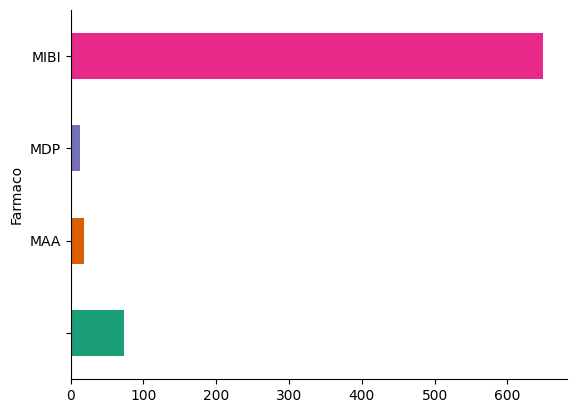

In [33]:
# @title Farmaco

from matplotlib import pyplot as plt
import seaborn as sns
doses.groupby('Farmaco').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
doses_grouped = doses.groupby('Regiao').apply(lambda x: x.sort_values('Dose', ascending=False)).reset_index(drop=True)
print(doses_grouped)

     ID_paciente     hospital Estado  Idade_anos  Peso_kg  Altura_m Sexo  \
0           3945   hospital 8     GO          59      650       167    M   
1         203117  hospital 11     MS          40     1600       187    M   
2           5452   hospital 6     DF          65      870       174    M   
3         203360  hospital 11     MS          79      850       173    M   
4         203166  hospital 11     MS          46      770       165    F   
..           ...          ...    ...         ...      ...       ...  ...   
749       203024  hospital 19     SC          70      750       160    F   
750       202911  hospital 15     PR          67      940       172    M   
751       202780  hospital 18     RS          59      581       158    F   
752       202802  hospital 18     RS          44      675       156    F   
753       203044  hospital 19     SC          69      730       163    F   

    Protocolo_Finalidade     Etapa   Dose        Data Radionuclideo Farmaco  \
0     CI

In [37]:
regioes_doses = doses.groupby('Regiao')['Dose'].sum().reset_index()

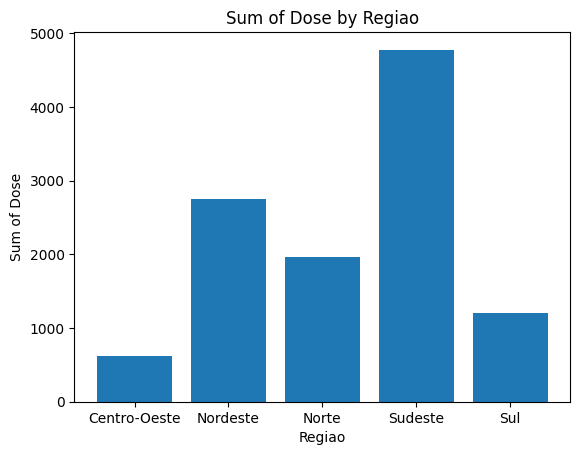

In [38]:
import matplotlib.pyplot as plt

plt.bar(regioes_doses['Regiao'], regioes_doses['Dose'])
plt.xlabel('Regiao')
plt.ylabel('Sum of Dose')
plt.title('Sum of Dose by Regiao')
plt.show()

In [39]:
doses_estresse = doses[doses['Etapa'] == 'Estresse']

In [43]:
regioes_doses_estresse = doses_estresse.groupby('Regiao')['Dose'].mean().reset_index()
print(regioes_doses_estresse)

         Regiao       Dose
0  Centro-Oeste  22.991500
1      Nordeste  23.742024
2         Norte  22.609677
3       Sudeste  23.075541
4           Sul  23.183514


In [44]:
dose_third_quartile = doses.groupby('Regiao')['Dose'].quantile(0.75)
print(dose_third_quartile)

Regiao
Centro-Oeste    25.4100
Nordeste        23.4225
Norte           21.3175
Sudeste         21.9250
Sul             21.6550
Name: Dose, dtype: float64


In [41]:
regioes_doses_avg = doses.groupby('Regiao')['Dose'].mean().reset_index()

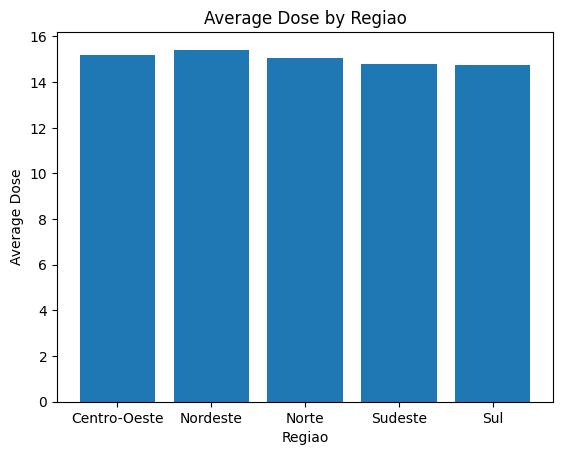

In [42]:
import matplotlib.pyplot as plt

plt.bar(regioes_doses_avg['Regiao'], regioes_doses_avg['Dose'])
plt.xlabel('Regiao')
plt.ylabel('Average Dose')
plt.title('Average Dose by Regiao')
plt.show()